# Demo on running SPRINTER libraries in Python

The following SPRINTER demo represents a guided example of running SPRINTER on the required input through its Python libraries and within a Jupyter notebook.
This demo uses [example data](https://doi.org/10.5281/zenodo.14060547) previous generated from the diploid and tetraploid ground truth datasets, generated in the related SPRINTER manuscript.
This demo requires SPRINTER to be installed in a conda environment in which also jupyter is installed (e.g., `conda create -n sprinter-libs sprinter jupyterlab`) and used to run this notebook.
Also, for simplicity, the demo is using the precomputed GC content file from hg19, but providing the reference genome remains reccomended.

In [2]:
import shlex
import pandas as pd
from IPython.display import Image

from sprinter.bin import sprinter

In [14]:
%%bash
# Required files are downloaded as described in the standard running SPRINTER demo.

export PLOIDY='tetraploid' # Change this to 'diploid' for running the diploid demo.
echo "Downloading ${PLOIDY} input file."
curl -L 'https://zenodo.org/records/14060548/files/gt_'${PLOIDY}'.tsv.gz?download=1' > sprinter.input.tsv.gz

echo "Downloading human reference genome, please be patient as downloading time may vary."
curl -L https://hgdownload.cse.ucsc.edu/goldenpath/hg19/bigZips/analysisSet/hg19.p13.plusMT.no_alt_analysis_set.fa.gz | gzip -d > hg19.fa

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  333M  100  333M    0     0  94.2M      0  0:00:03  0:00:03 --:--:-- 94.2M


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  823M  100  823M    0     0  6284k      0  0:02:14  0:02:14 --:--:-- 11.7M


In [17]:
input_data = pd.read_csv('sprinter.input.tsv.gz', sep='\t')[['CHR', 'START', 'END', 'CELL', 'NORM_COUNT', 'COUNT', 'RAW_RDR']]
input_data

,CHR,START,END,CELL,NORM_COUNT,COUNT,RAW_RDR
0,chr1,0,50000,G1_AAACATGAGGAT,20,4,1.005479
1,chr1,0,50000,G1_AAGCGTCCCCCA,20,4,1.409660
2,chr1,0,50000,G1_AAGTGAAAGCGA,20,4,1.201312
3,chr1,0,50000,G1_AATCTAGTCATG,20,2,0.785909
4,chr1,0,50000,G1_ACAGGATCTTCG,20,2,0.804503
...,...,...,...,...,...,...,...
26334969,chr22,51200000,51250000,G2_TTGAGTGCTGCC,48,16,0.830039
26334970,chr22,51200000,51250000,G2_TTGTCGCCATAT,48,2,0.407951
26334971,chr22,51200000,51250000,G2_TTGTTCGGTTTG,48,16,0.870429
26334972,chr22,51200000,51250000,G2_TTGTTGAGATTG,48,20,1.011843


[2024-Nov-13 11:38:31]The SPRINTER algorithm
(Single-cell Proliferation Rate Inference in Non-homogeneous Tumors through Evolutionary Routes)

                                                                                            
                                                                                            
                                              .........                                     
                                          .................                                 
                                          .................                                 
                                        .........%%%%%%......                               
                     -----------        ........%%%%%%%%.....                               
                                        .......%%%%%%%%%%....                               
                                        ........%%%%%%%%.....                               
                   -

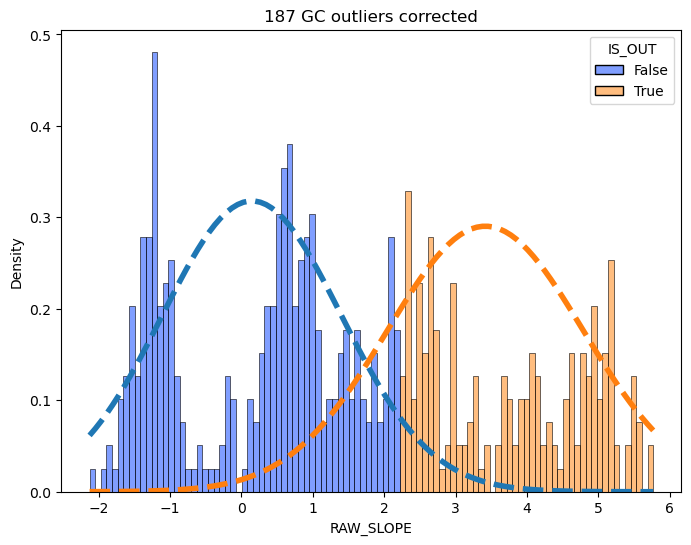

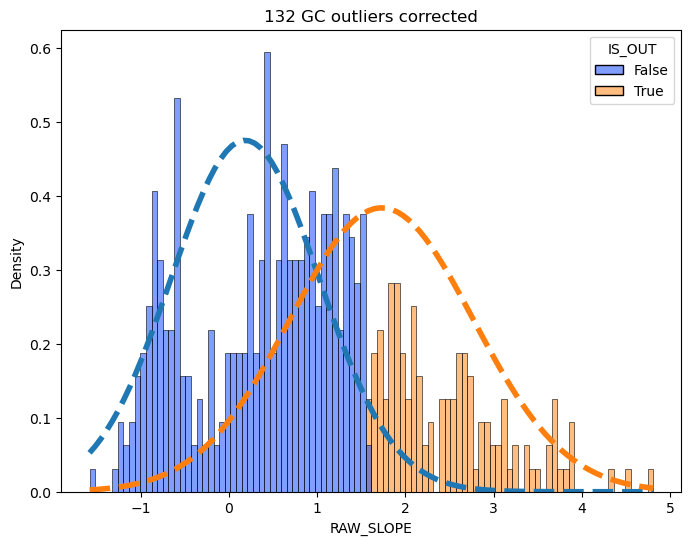

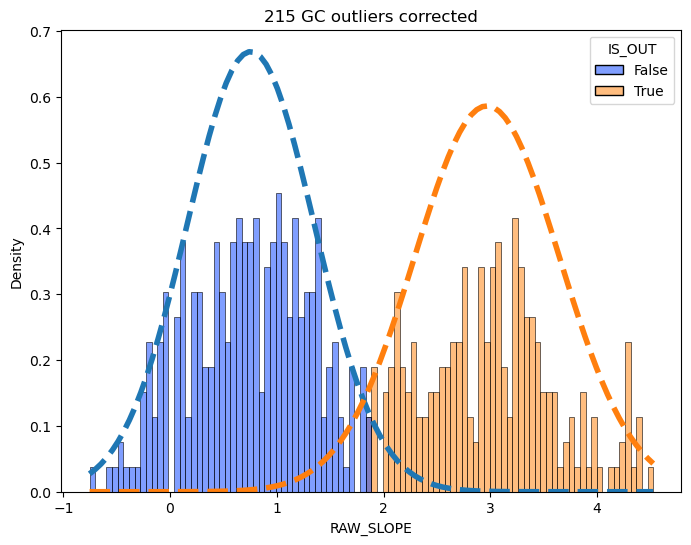

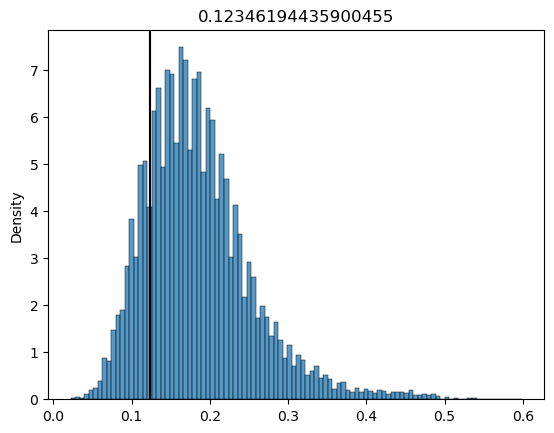

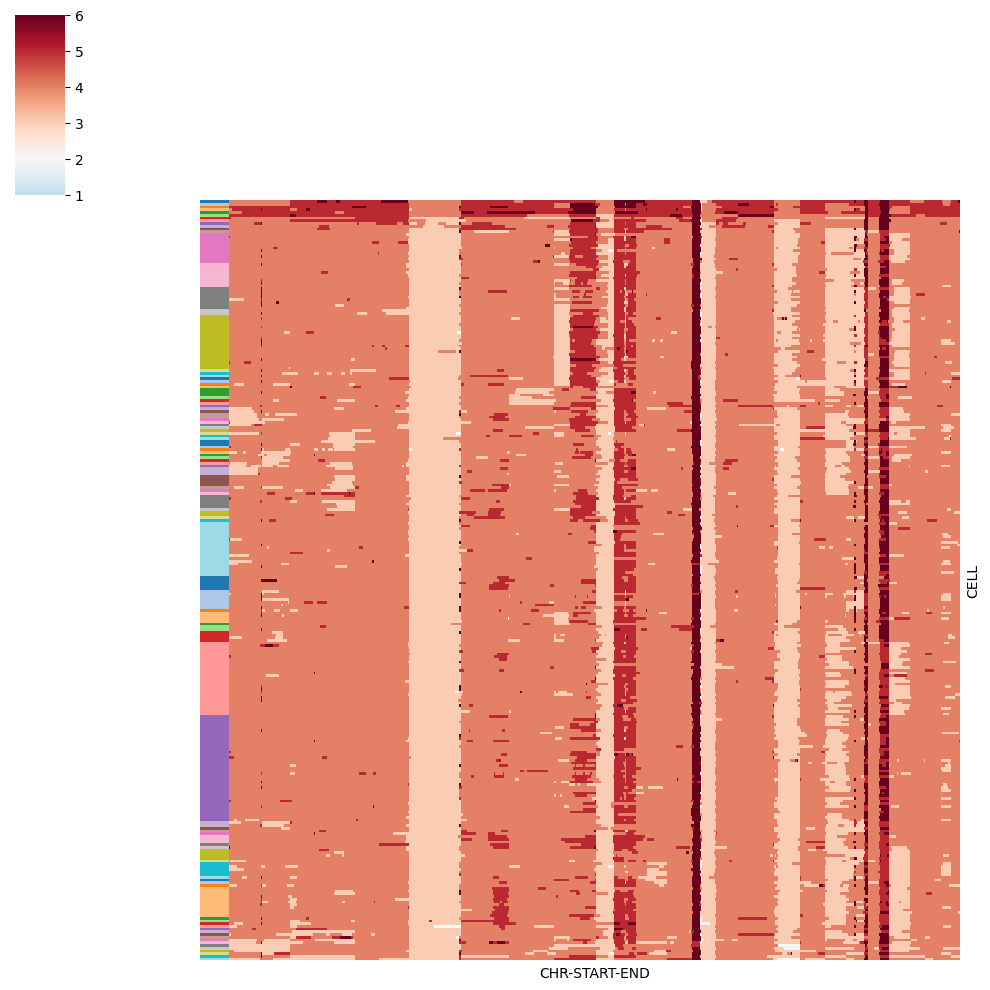

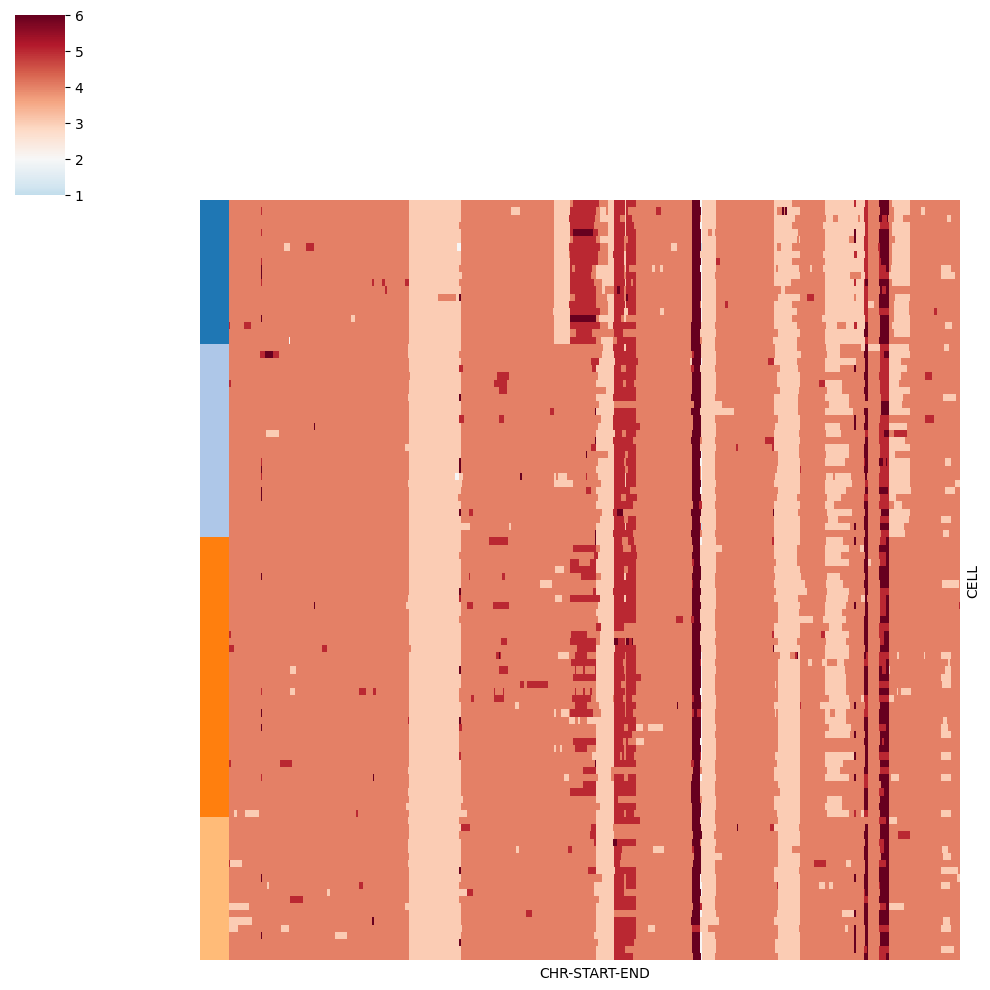

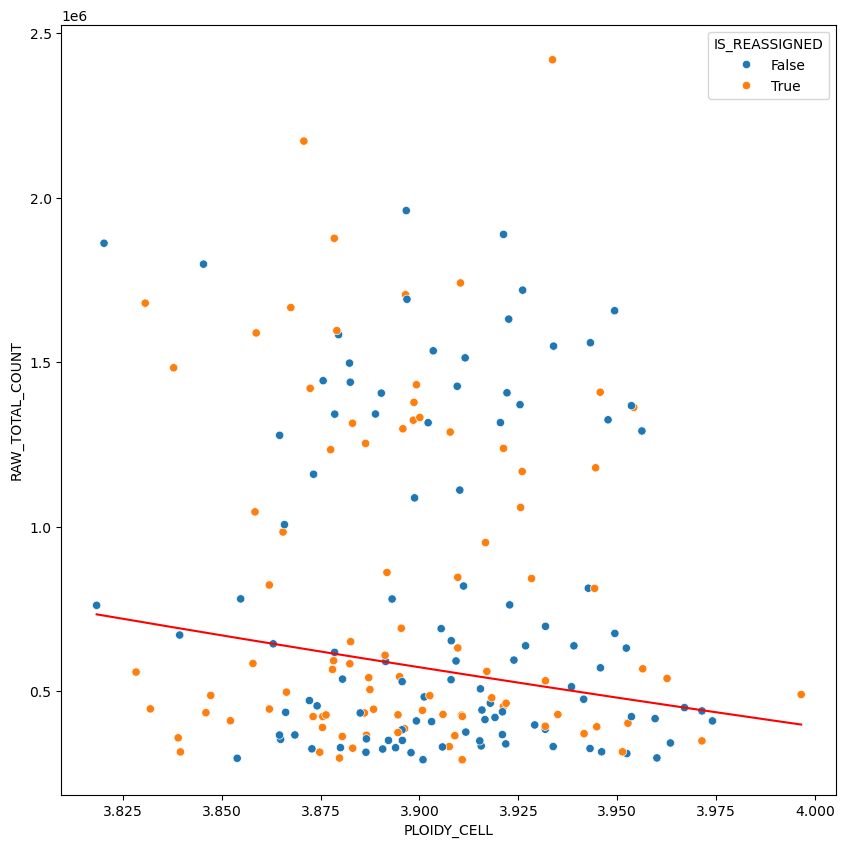

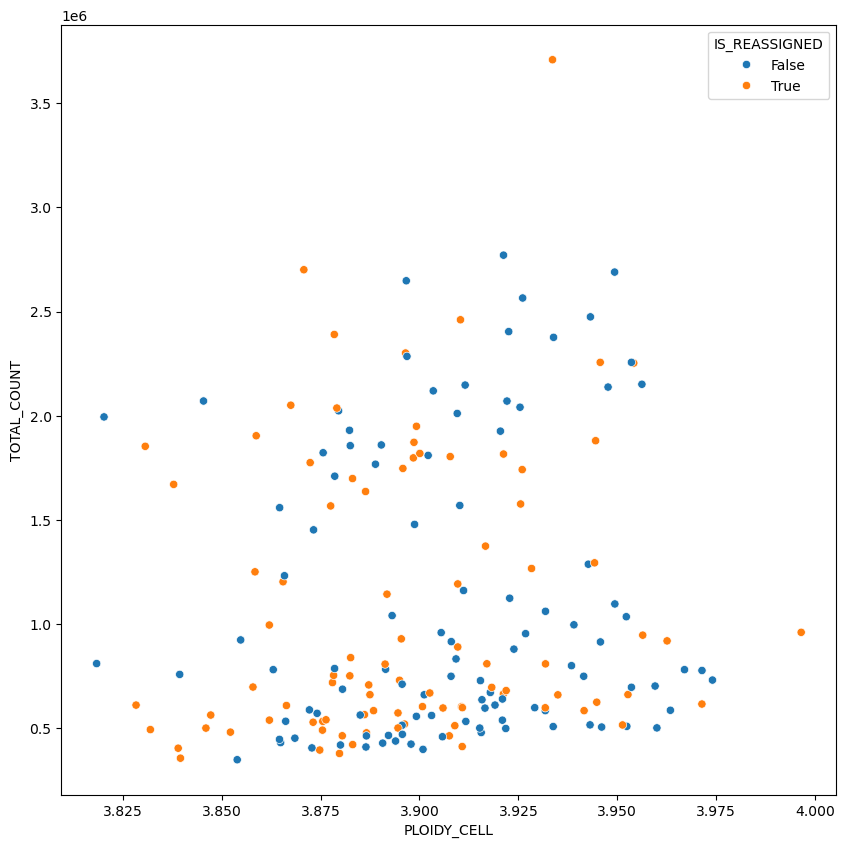

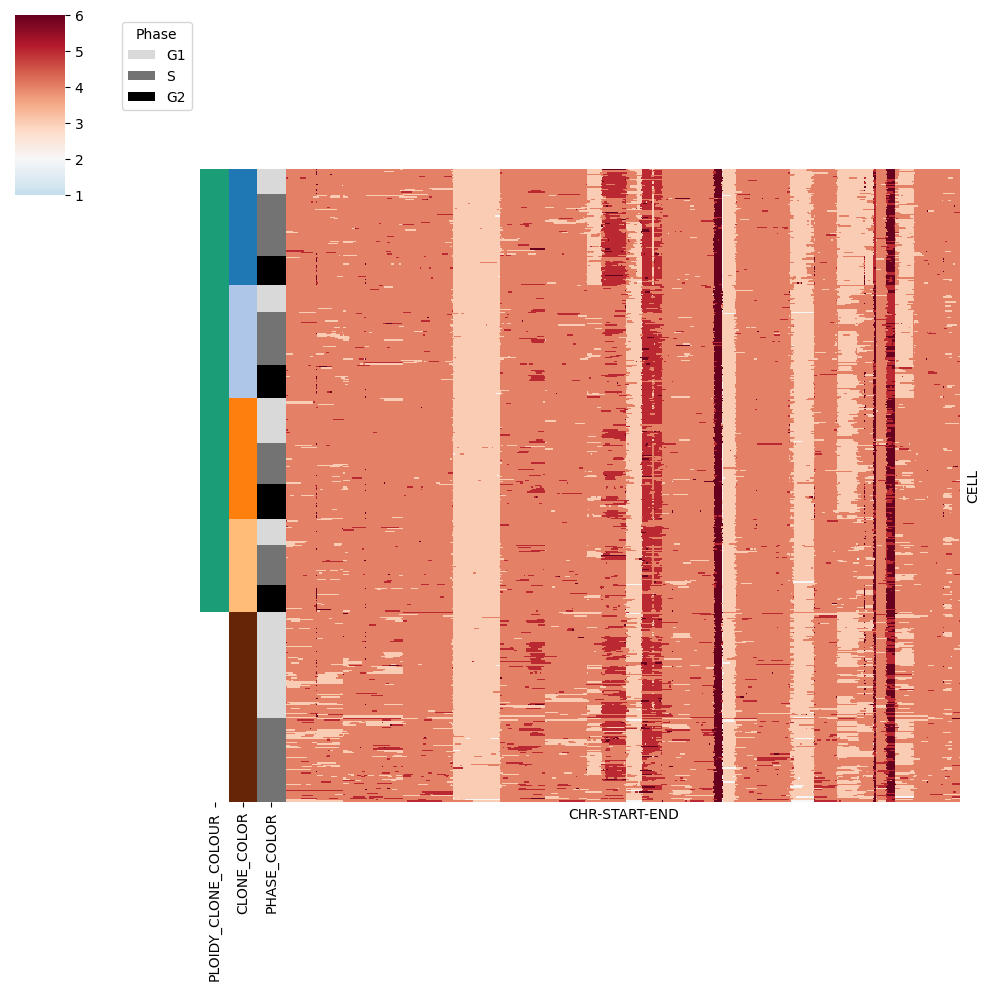

In [18]:
# The input arguments can be specified using the same format as from command-line SPRINTER command.

sprinter.main(inputdata=input_data, args=shlex.split('--minreads 100000 --rtreads 200 --cnreads 1000 --minnumcells 15 -j 8'))

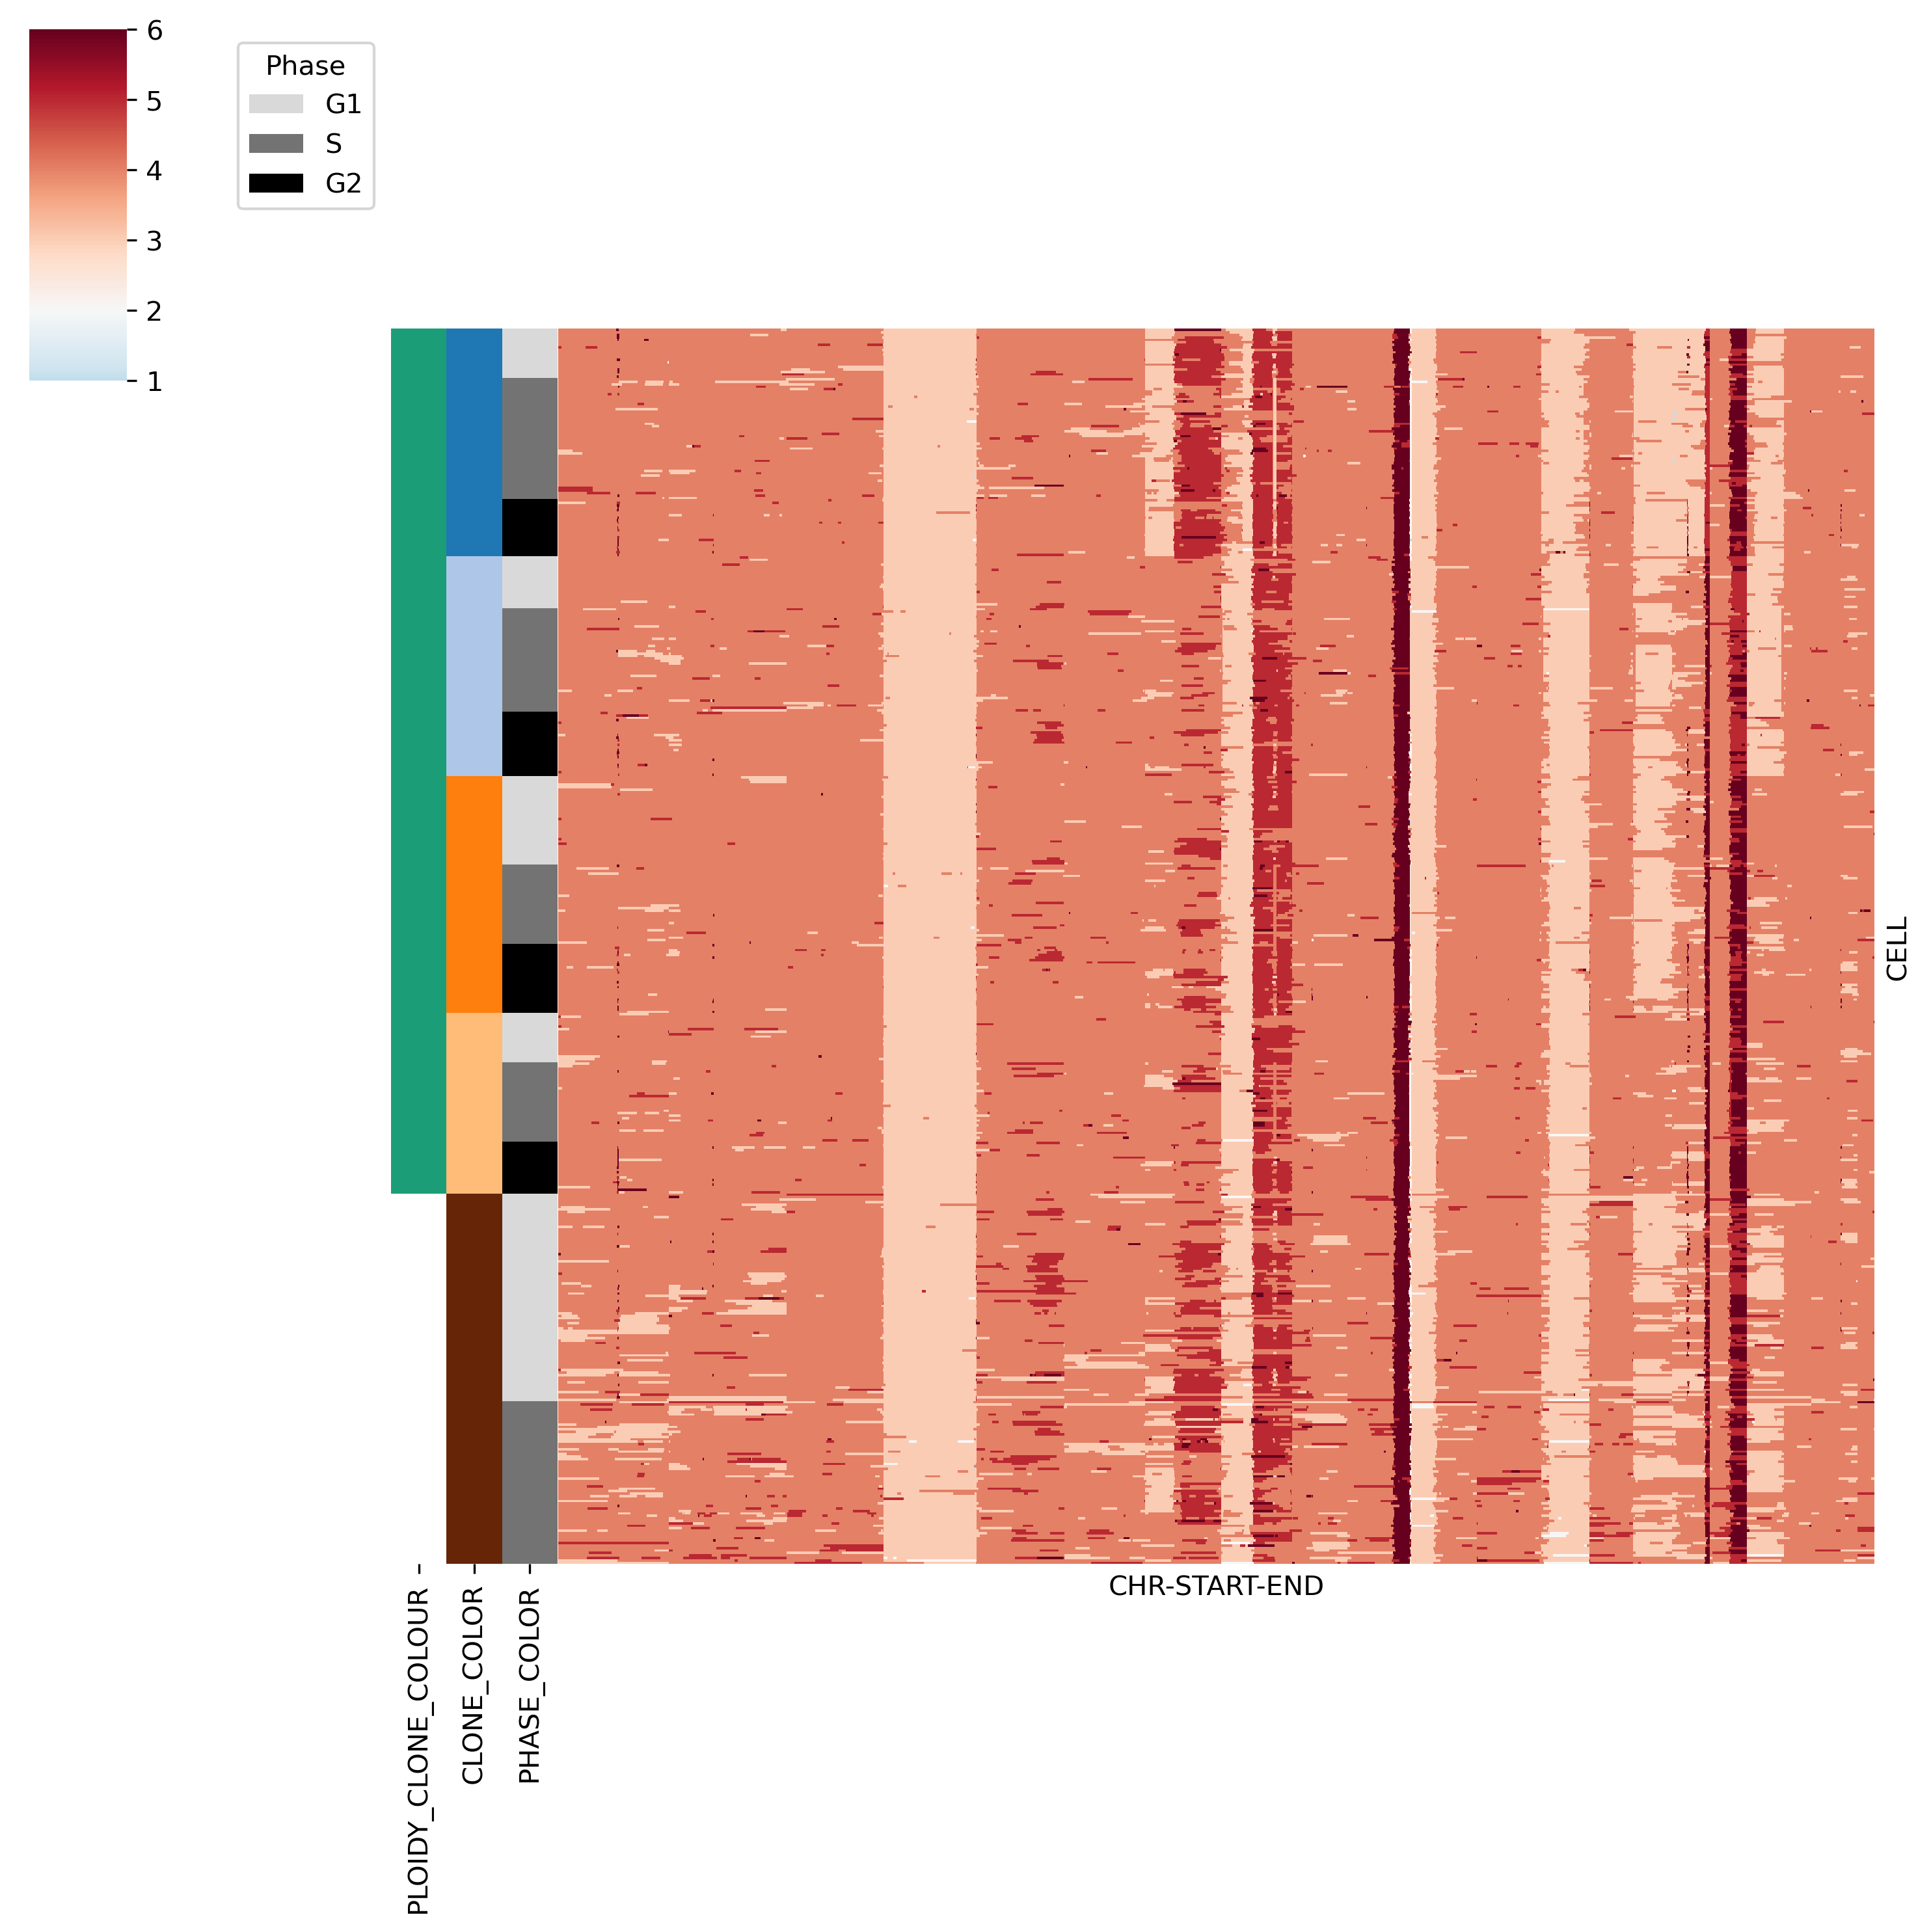

In [3]:
Image('sprinter_finalresult.png')